> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- The Dataset came in (.csv) file `tmdb-movies.csv` 


#### We will first import the needed libiraries and read the csv files


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Remove Duplicated Rows

In [3]:

df.drop_duplicates(inplace=True);


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling

1. As we saw from the intro section **some columns contain useless information** so we need to keep only the ones that we are going to use 

2. in addition to that we need to ***change the dtype*** of ***`release_date`*** to be datetime for easer manipulation 
3. **Fill null values** 


### 1) Drop low priority columns
___

1. __'imdb_id'__  :  we will not be using this column
2. __'homepage'__ : we will not be using this column and it have alot of missing values
3. __'tagline'__  : Can be used but untill now it's not used
4. __'overview'__ : Can be used for training ML model for any kind of prediction or clustering 


In [5]:
unwanted_columns = ['imdb_id' , 'homepage' , 'tagline' , 'overview']

df.drop(columns= unwanted_columns , inplace = True)

df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Check Number of Columns the old was (21)

In [6]:
df.shape

(10865, 17)

### 2) Change wrong Dtypes
------
- Change The __`release_date`__ from `String` to `datetime`

In [7]:
df.release_date.dtype

dtype('O')

In [8]:
df['release_date']=pd.to_datetime(df['release_date'])

In [9]:
df.release_date.dtype

dtype('<M8[ns]')

In [10]:
df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

### 3) Filling the Null values 
___
- We have null values in `keywords` ,`production_companies` ,`cast`  so we will fill it with an empty string ' '

In [12]:
df['keywords'].fillna('',inplace=True)
df['production_companies'].fillna('',inplace=True)
df['cast'].fillna('',inplace=True)

In [13]:
print("Check : {} {} {}".format(df['keywords'].isnull().sum() , df['production_companies'].isnull().sum() ,df['cast'].isnull().sum()) )

Check : 0 0 0


<a id='eda'></a>
## Exploratory Data Analysis


### 1) Does film making make more profit as years pass on ? 
___

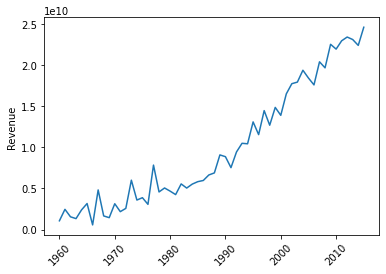

In [14]:
# Group by each year and sum the revenue
fig, ax = plt.subplots()
ax.plot(df.groupby("release_year")['revenue_adj'].sum())
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

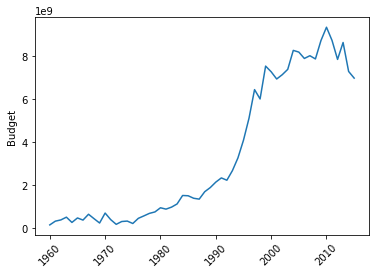

In [15]:
fig, ax = plt.subplots()
ax.plot(df.groupby("release_year")['budget_adj'].sum())
plt.ylabel("Budget")
plt.xticks(rotation=45)
plt.show()

As we can the the interval from 1990 - 2000 has shown big increase in the budget but from 2010 it looks like it's going to settle or go down 

### Pure revenue for each year to be certain about the answer

This can be miss leading so we can Check actual revenue by the following    (`revenue_adj` - `budget_adj`) 

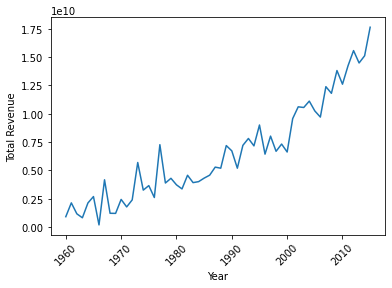

In [16]:
# Creating a new column to get the total earnings 
df['total_rev'] = df['revenue_adj'] - df['budget_adj']

fig, ax = plt.subplots()
ax.plot(df.groupby("release_year")['total_rev'].sum())
plt.ylabel("Total Revenue")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

As we saw the incearsing rate of budget and revenue maybe it's just that more movies are being produced 
So let's take alook about the number of movies produced each year

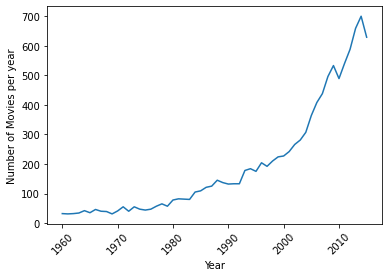

In [17]:
fig, ax = plt.subplots()
ax.plot(df.groupby("release_year")['id'].count())
plt.ylabel("Number of Movies per year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

### Conclusion :


As we saw as years pass on and more tech with more options to attend movies more movies are being produced which leads to more revenue gained and more budget 

Note : 
    Last couple of years the number of movies produced starts decreasing so maybe it will settle down as it reached the peak already 
    And that's something we will know as days pass

### 2) Does a certain month of the year have higher chance of making more revenue ? 
___

Just as we did with the year we will now investigate the revenue and the count of movies produced each month to see if certain months gain more or producers tends to release their movies at that time

In [18]:
df['release_month'] = df['release_date'].dt.month_name()
df['release_month'].value_counts()

September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: release_month, dtype: int64

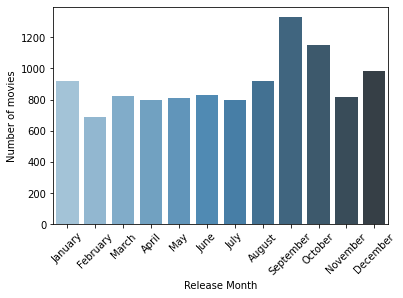

In [19]:
order = ['January' , 'February' , 'March' , 'April' ,'May' , 'June' , 'July' , 'August' , 'September' , 'October' , 'November' , 'December' ]
month_count =  df['release_month'].value_counts()
sns.barplot(x=month_count.index  , order =order ,y=month_count ,palette='Blues_d')
plt.xticks(rotation=45)
plt.ylabel("Number of movies")
plt.xlabel("Release Month")
plt.show()


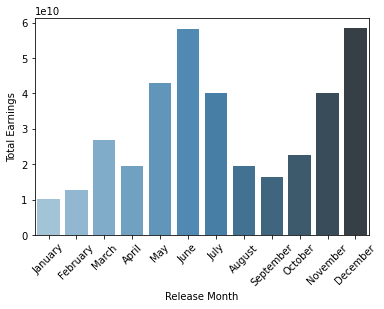

In [20]:
month_count =  df.groupby('release_month')['total_rev'].sum()
sns.barplot(x=month_count.index  , order =order ,y=month_count ,palette='Blues_d')
plt.xticks(rotation=45)
plt.ylabel("Total Earnings")
plt.xlabel("Release Month")
plt.show()

Some thing that i was not expecting that `September` is one of the lowest revenues amonge other months despite having the most number of produced movies
and `June` sharing the highest revenues with `December` despite having low rate of movies prodcued

We can investigate  September to get the reason why it has a very low revenues

Maybe Alot of old movies was produced in `September` ?

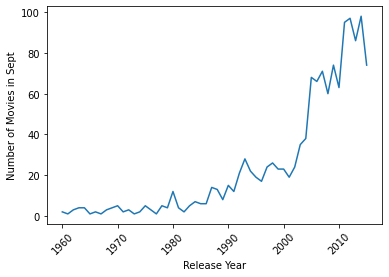

In [21]:
sub_df = df[df['release_month'] == 'September']
fig, ax = plt.subplots()
ax.plot(sub_df.groupby("release_year")['id'].count())
plt.ylabel("Number of Movies in Sept")
plt.xlabel("Release Year")
plt.xticks(rotation=45)
plt.show()

It looks like the distribution is the same 

### 3) Does spending more on a movie automaticly increase the revenue or not always ?
___

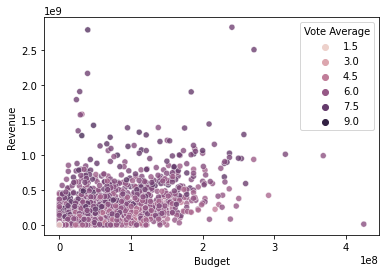

In [22]:
sns.scatterplot(x='budget_adj' , y='revenue_adj' , data=df , alpha=.8 , hue='vote_average')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.legend(title="Vote Average")
plt.show()

We can see that spending more budget on a movie doesn't guarantee gaining more revenue we can se the highest spent budget gets a very low revenue 
and alot of low budget movies gain the most revenue ever

### 4) Does the more the rating goes the more revenue gained ?
___

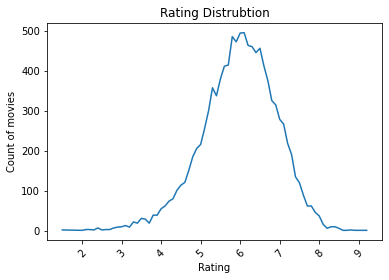

In [23]:

fig, ax = plt.subplots()
ax.plot(df.groupby("vote_average")['id'].count())
plt.ylabel("Count of movies")
plt.title("Rating Distrubtion")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.show()

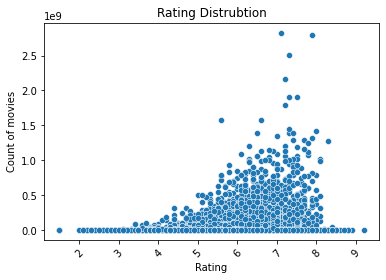

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(x= "vote_average" ,y='revenue_adj' ,data=df )
plt.ylabel("Count of movies")
plt.title("Rating Distrubtion")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.show()

We have alot of movies with a very high Rating and still with 0 Revenue maybe we can investigate this 

In [25]:
sub_df = df[df['revenue_adj'] == 0]
sub_df = sub_df[sub_df['vote_average'] > 7]
sub_df.shape

(652, 19)

In [26]:
sub_df.genres.value_counts()


Documentary                         111
Drama                                57
Comedy                               47
Documentary|Music                    25
Animation|Family                     16
                                   ... 
Documentary|Comedy|TV Movie           1
Action|Animation|Science Fiction      1
Action|Adventure|Crime|Thriller       1
Documentary|Drama|History             1
Drama|Family|Fantasy                  1
Name: genres, Length: 234, dtype: int64

It's now clear that the Documentary movies have very high rating but still with zero revenues and that's makes alot of sense

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

We Finished Investigating the Dataset with our 4 questions <br>
Each Question had the answer at the end of the Analysis <br>
Thank you..